# Lecture 29


We'll walkthrough reading and manipulating a CSV in python. For this example, we'll use the grades from the class.

Use pandas to read in the data.

In [1]:
import pandas as pd

In [9]:
!ls

Data-1401-Grades.csv Lecture.29.ipynb


Before we read in the file, lets take a look.

In [10]:
!cat Data-1401-Grades.csv






Completed the lab,"ex4- attempted,wrong solution -2
ex8 -wrong solution(sequence not correct) -2","ex1 - Nameerror get_size() is not defined(-2)
ex2 - returns -1 for all conditions, does not test for all conditions.(-3)
ex3 - does not construct board(-5)
ex4 - does not construct the board (-5)
ex5 - does not construct the board (-5)
ex6 - does not construct the board (-5)
ex7 - no construction of board (-5)
ex8-not attempted
ex9-not attempted
ex10 - does not create board for 5*5 (-4)
ex11 - not attempted ",,"q1c - does not return the list instead returns the range(-5)
q2 - output is wrong, output should had been [4, 5, 60], 
[8, 10, 120],[12, 15, 180] (-5)
q3a - should be in a list format (-2)
q3b - Just generated the histogram.output does not have x90 value.(-10)
q4a - should return the highest card instead of True for flush(), Straight(), straight_flush()(-6)


Completed the lab,"Completed the whole lab
","ex10 - not attempted (-10)
ex11 - not attempted","ex8-not attempted
ex9- 

The file is the CSV export of a google sheet, which isn't ideally formatted:

* First line is the grading rubric, not the column names.
* Lines alternate between the grade and the comments for the specific lab/exam.
* The exam grades are in the format XX-sent.

Reading the file with a CSV reader therefore isn't going to get table in the right format:

In [98]:
df = pd.read_csv("Data-1401-Grades.csv")

In [99]:
df

,"No attempt: -5,wrong:-1...-5","No attempt: -5, wrong: -2","No attempt: -10, wrong: -1..-7","No attempt: -10, wrong: -1 ..-8. no bonus","No attempt: -25, wrong: -1..-20","No attempt: -14, wrong: -1..-12, bonus 0..14","No attempt: -15, wrong: -1..-12, bonus 0..5","No attempt: -14, wrong: -1..-12",Unnamed: 8
0,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,NaN,Lab 7,Exam 2
1,NaN,0,0,NaN,0,0,0.0,0,0
2,no solution,no solution,-did not submit the Lab,NaN,did not submit the exam,NaN,NaN,NaN,NaN
3,100,96,46,NaN,68-sent,NaN,NaN,NaN,NaN
4,Completed the lab,"ex4- attempted,wrong solution -2\nex8 -wrong s...",ex1 - Nameerror get_size() is not defined(-2)\...,NaN,q1c - does not return the list instead returns...,NaN,NaN,NaN,NaN
5,100,100,90,NaN,88-sent,NaN,NaN,NaN,NaN
6,Completed the lab,Completed the whole lab\n,ex10 - not attempted (-10)\nex11 - not attempted,ex8-not attempted\nex9- not attempted,note - try to use better variable names\nq3b -...,NaN,NaN,NaN,NaN
7,93,100,24,NaN,96-sent,NaN,NaN,NaN,NaN
8,"ex4 - attempted, wrong answer(-2)\nex5c - not ...",Completed the whole lab,"ex2 - returns 1 for winner_2, returns 1 for no...",NaN,note- try not to use names which are built-in ...,NaN,NaN,NaN,NaN
9,0,81,0,0,43-sent,NaN,NaN,NaN,NaN


Let's start fixing these issues. First we can just drop the first line. There are lots of ways of doing so... easiest would be to use some of the command line unix utilities we became familiar with in the beginning of the course. First let's count the lines:

In [13]:
!wc -l Data-1401-Grades.csv

     179 Data-1401-Grades.csv


We can use the unix command `tail` to write out the last $n$ lines of a file... let's use it to drop the first line:

In [100]:
!tail -179 Data-1401-Grades.csv





Completed the lab,"ex4- attempted,wrong solution -2
ex8 -wrong solution(sequence not correct) -2","ex1 - Nameerror get_size() is not defined(-2)
ex2 - returns -1 for all conditions, does not test for all conditions.(-3)
ex3 - does not construct board(-5)
ex4 - does not construct the board (-5)
ex5 - does not construct the board (-5)
ex6 - does not construct the board (-5)
ex7 - no construction of board (-5)
ex8-not attempted
ex9-not attempted
ex10 - does not create board for 5*5 (-4)
ex11 - not attempted ",,"q1c - does not return the list instead returns the range(-5)
q2 - output is wrong, output should had been [4, 5, 60], 
[8, 10, 120],[12, 15, 180] (-5)
q3a - should be in a list format (-2)
q3b - Just generated the histogram.output does not have x90 value.(-10)
q4a - should return the highest card instead of True for flush(), Straight(), straight_flush()(-6)


Completed the lab,"Completed the whole lab
","ex10 - not attempted (-10)
ex11 - not attempted","ex8-not attempted
ex9- n

We can use unix redirection to write the output into another file:

In [101]:
!tail -179 Data-1401-Grades.csv > Data-1401-Grades-Fixed.csv

Let's see the result:

In [102]:
!cat Data-1401-Grades-Fixed.csv





Completed the lab,"ex4- attempted,wrong solution -2
ex8 -wrong solution(sequence not correct) -2","ex1 - Nameerror get_size() is not defined(-2)
ex2 - returns -1 for all conditions, does not test for all conditions.(-3)
ex3 - does not construct board(-5)
ex4 - does not construct the board (-5)
ex5 - does not construct the board (-5)
ex6 - does not construct the board (-5)
ex7 - no construction of board (-5)
ex8-not attempted
ex9-not attempted
ex10 - does not create board for 5*5 (-4)
ex11 - not attempted ",,"q1c - does not return the list instead returns the range(-5)
q2 - output is wrong, output should had been [4, 5, 60], 
[8, 10, 120],[12, 15, 180] (-5)
q3a - should be in a list format (-2)
q3b - Just generated the histogram.output does not have x90 value.(-10)
q4a - should return the highest card instead of True for flush(), Straight(), straight_flush()(-6)


Completed the lab,"Completed the whole lab
","ex10 - not attempted (-10)
ex11 - not attempted","ex8-not attempted
ex9- n

Let's try reading the new file now:

In [103]:
df = pd.read_csv("Data-1401-Grades-Fixed.csv")

In [104]:
df

,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,Unnamed: 6,Lab 7,Exam 2
0,NaN,0,0,NaN,0,0.0,0.0,0.0,0.0
1,no solution,no solution,-did not submit the Lab,NaN,did not submit the exam,NaN,NaN,NaN,NaN
2,100,96,46,NaN,68-sent,NaN,NaN,NaN,NaN
3,Completed the lab,"ex4- attempted,wrong solution -2\nex8 -wrong s...",ex1 - Nameerror get_size() is not defined(-2)\...,NaN,q1c - does not return the list instead returns...,NaN,NaN,NaN,NaN
4,100,100,90,NaN,88-sent,NaN,NaN,NaN,NaN
5,Completed the lab,Completed the whole lab\n,ex10 - not attempted (-10)\nex11 - not attempted,ex8-not attempted\nex9- not attempted,note - try to use better variable names\nq3b -...,NaN,NaN,NaN,NaN
6,93,100,24,NaN,96-sent,NaN,NaN,NaN,NaN
7,"ex4 - attempted, wrong answer(-2)\nex5c - not ...",Completed the whole lab,"ex2 - returns 1 for winner_2, returns 1 for no...",NaN,note- try not to use names which are built-in ...,NaN,NaN,NaN,NaN
8,0,81,0,0,43-sent,NaN,NaN,NaN,NaN
9,no solution,ex2-attempted(empty list) -2\nex3 - no solutio...,- did not submit the lab,-did not submit the lab,q1b - returns the index 0 instead of 23 as men...,NaN,NaN,NaN,NaN


Now we have to deal with the problem that every other line contains information we don't need. For example:

In [105]:
df["Lab 1"]

0                                                   NaN
1                                           no solution
2                                                   100
3                                     Completed the lab
4                                                   100
5                                     Completed the lab
6                                                    93
7     ex4 - attempted, wrong answer(-2)\nex5c - not ...
8                                                     0
9                                           no solution
10                                                   95
11                  -ex5c missing(-5)                  
12                                                  100
13                                    completed the lab
14                                                   95
15                                    -ex5c missing(-5)
16                                                   95
17                                    -ex5c miss

The data is now in memory stored as a data frame. Let's take a few minutes and go over the features of DataFrame from the Pandas documentation:

* [Pandas Data Structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro)
* [Pandas DataFrame in 10 minutes](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

We can deal with the "every-other-line" problem by using Pandas to create a new DataFrame from select row of our existing DataFrame using boolean indexing. Basically if you use index a DataFrame with a list of booleans with the same length as the number of rows in the DataFrame, it'll use the booleans to select the rows. So we need a list containing of alternating True/False booleans:

In [106]:
mask=list()
for i in range(16):
    mask.append(True)
    mask.append(False)
mask

[True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False]

In [107]:
df_0=df[mask]

In [108]:
df_0

,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,Unnamed: 6,Lab 7,Exam 2
0,NaN,0,0,NaN,0,0.0,0.0,0.0,0.0
2,100,96,46,NaN,68-sent,NaN,NaN,NaN,NaN
4,100,100,90,NaN,88-sent,NaN,NaN,NaN,NaN
6,93,100,24,NaN,96-sent,NaN,NaN,NaN,NaN
8,0,81,0,0,43-sent,NaN,NaN,NaN,NaN
10,95,100,105,NaN,96-sent,NaN,NaN,NaN,NaN
12,100,98,87,NaN,89-sent,NaN,NaN,NaN,NaN
14,95,98,50,NaN,52,NaN,NaN,NaN,NaN
16,95,96,98,NaN,100-sent,NaN,NaN,NaN,NaN
18,0,78,37,NaN,67,NaN,NaN,NaN,NaN


Next, we have to fix the "Exam 1" column and remove "-sent" from it. Here's the plan:

1. Ask DataFrame for the column.
1. Convert Column into a list.
1. Fix every item of the list
    1. Remove "-sent"
    1. Convert to int (from string)
1. Add back the fixed list as a new column.

In [110]:
# 1
df_0["Exam 1"]

0            0
2      68-sent
4      88-sent
6      96-sent
8      43-sent
10     96-sent
12     89-sent
14          52
16    100-sent
18          67
20           0
22     66-sent
24     96-sent
26     64-sent
28     64-sent
30     98-sent
Name: Exam 1, dtype: object

In [111]:
#2
df_0["Exam 1"].tolist()

['0',
 '68-sent',
 '88-sent',
 '96-sent',
 '43-sent',
 '96-sent',
 '89-sent',
 '52',
 '100-sent',
 '67',
 '0',
 '66-sent',
 '96-sent',
 '64-sent',
 '64-sent',
 '98-sent']

In [112]:
#3A
list(map(lambda x: x.split("-")[0] ,df_0["Exam 1"].tolist()))

['0',
 '68',
 '88',
 '96',
 '43',
 '96',
 '89',
 '52',
 '100',
 '67',
 '0',
 '66',
 '96',
 '64',
 '64',
 '98']

In [113]:
#3B
list(map(lambda x: int(x.split("-")[0]) ,df_0["Exam 1"].tolist()))

[0, 68, 88, 96, 43, 96, 89, 52, 100, 67, 0, 66, 96, 64, 64, 98]

In [114]:
#4
df_0["Exam 1 Fixed"] = list(map(lambda x: int(x.split("-")[0]) ,df_0["Exam 1"].tolist()))

<ipython-input-114-ab91c4be8828>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["Exam 1 Fixed"] = list(map(lambda x: int(x.split("-")[0]) ,df_0["Exam 1"].tolist()))


In [115]:
df_0

,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,Unnamed: 6,Lab 7,Exam 2,Exam 1 Fixed
0,NaN,0,0,NaN,0,0.0,0.0,0.0,0.0,0
2,100,96,46,NaN,68-sent,NaN,NaN,NaN,NaN,68
4,100,100,90,NaN,88-sent,NaN,NaN,NaN,NaN,88
6,93,100,24,NaN,96-sent,NaN,NaN,NaN,NaN,96
8,0,81,0,0,43-sent,NaN,NaN,NaN,NaN,43
10,95,100,105,NaN,96-sent,NaN,NaN,NaN,NaN,96
12,100,98,87,NaN,89-sent,NaN,NaN,NaN,NaN,89
14,95,98,50,NaN,52,NaN,NaN,NaN,NaN,52
16,95,96,98,NaN,100-sent,NaN,NaN,NaN,NaN,100
18,0,78,37,NaN,67,NaN,NaN,NaN,NaN,67


(array([2., 0., 0., 0., 1., 1., 5., 0., 2., 5.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

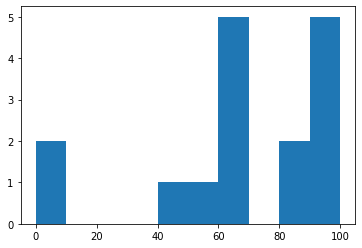

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df_0["Exam 1 Fixed"])

In [51]:
df_0["Exam 1 Fixed"]

0       0
2      68
4      88
6      96
8      43
10     96
12     89
14     52
16    100
18     67
20      0
22     66
24     96
26     64
28     64
30     98
Name: Exam 1 Fixed, dtype: int64

In [116]:
print("Mean:",np.mean(df_0["Exam 1 Fixed"]))
print("Std:",np.std(df_0["Exam 1 Fixed"]))

Mean: 67.9375
Std: 30.906044615091073


The mean/standard deviation is being pulled down/wide by the low grades, lets take them out using selection. Note that applying conditionals to DataFrames and Series give you back a boolean Series:

In [117]:
min_exam_1=55
df_0["Exam 1 Fixed"]>min_exam_1

0     False
2      True
4      True
6      True
8     False
10     True
12     True
14    False
16     True
18     True
20    False
22     True
24     True
26     True
28     True
30     True
Name: Exam 1 Fixed, dtype: bool

In [119]:
exam_1_df=df_0[df_0["Exam 1 Fixed"]>min_exam_1]

In [120]:
exam_1_df

,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,Unnamed: 6,Lab 7,Exam 2,Exam 1 Fixed
2,100,96,46,NaN,68-sent,NaN,NaN,NaN,NaN,68
4,100,100,90,NaN,88-sent,NaN,NaN,NaN,NaN,88
6,93,100,24,NaN,96-sent,NaN,NaN,NaN,NaN,96
10,95,100,105,NaN,96-sent,NaN,NaN,NaN,NaN,96
12,100,98,87,NaN,89-sent,NaN,NaN,NaN,NaN,89
16,95,96,98,NaN,100-sent,NaN,NaN,NaN,NaN,100
18,0,78,37,NaN,67,NaN,NaN,NaN,NaN,67
22,95,89,0,0,66-sent,NaN,NaN,NaN,NaN,66
24,98,94,35,NaN,96-sent,NaN,NaN,NaN,NaN,96
26,93,77,23,NaN,64-sent,NaN,NaN,NaN,NaN,64


(array([4., 1., 0., 0., 0., 0., 2., 0., 3., 2.]),
 array([ 64. ,  67.6,  71.2,  74.8,  78.4,  82. ,  85.6,  89.2,  92.8,
         96.4, 100. ]),
 <a list of 10 Patch objects>)

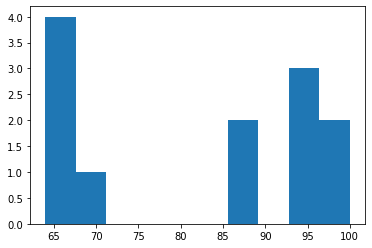

In [121]:
plt.hist(exam_1_df["Exam 1 Fixed"])

In [122]:
print("Mean:",np.mean(exam_1_df["Exam 1 Fixed"]))
print("Std:",np.std(exam_1_df["Exam 1 Fixed"]))

Mean: 82.66666666666667
Std: 14.642024753731599


Now lets apply the grade boundries (from last lecture):

In [124]:
grades = df_0["Exam 1 Fixed"].tolist()

def in_range(a,b):
    return lambda x: x<b and x>=a
print("Number of As:",len(list(filter(in_range(90.,101.),grades))))
print("Number of Bs:",len(list(filter(in_range(80.,90.),grades))))
print("Number of Cs:",len(list(filter(in_range(64.,80.),grades))))
print("Number of Ds:",len(list(filter(in_range(50.,64.),grades))))
print("Number of Fs:",len(list(filter(in_range(0.,50.),grades))))

Number of As: 5
Number of Bs: 2
Number of Cs: 5
Number of Ds: 1
Number of Fs: 3


We can accomplish the same counting using a histogram:

In [126]:
np.histogram(df_0["Exam 1 Fixed"],bins=[0,50,64,80,90,101])

(array([3, 1, 5, 2, 5]), array([  0,  50,  64,  80,  90, 101]))

(array([4., 5., 2., 4., 1.]),
 array([  0,  60,  80,  90, 100, 110]),
 <a list of 5 Patch objects>)

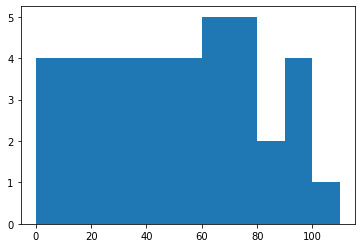

In [129]:
plt.hist(df_0["Exam 1 Fixed"],bins=[0,60,80,90,100,110])

There were many steps to what we did above... let's try to put it together into a function we reuse to also grade  labs and other exams. 

First, let's create a data structure to store the grade boundries, for example:

In [130]:
grades_0={"A+":100,
          "A":90,
          "B":80, 
          "C":64,
          "D":50,
          "F":0 }

In [131]:
grades_0

{'A+': 100, 'A': 90, 'B': 80, 'C': 64, 'D': 50, 'F': 0}

Might be useful to have the inverse map too:

In [146]:
grades_inverse=dict(zip(grades_0.values(),grades_0.keys()))

In [147]:
grades_inverse

{100: 'A+', 90: 'A', 80: 'B', 64: 'C', 50: 'D', 0: 'F'}

One problem is that python dictionaries are not guaranteed to keep the order, and we are implying that the order matters. Instead we can use an `OrderedDict`:

In [152]:
from collections import OrderedDict 

In [153]:
grades_inverse=OrderedDict(zip(list(grades_0.values())[::-1],
                               list(grades_0.keys())[::-1]))

In [154]:
grades_inverse

OrderedDict([(0, 'F'),
             (50, 'D'),
             (64, 'C'),
             (80, 'B'),
             (90, 'A'),
             (100, 'A+')])

In [155]:
grades=OrderedDict(zip(list(grades_0.keys())[::-1],
                       list(grades_0.values())[::-1]))

In [156]:
grades

OrderedDict([('F', 0),
             ('D', 50),
             ('C', 64),
             ('B', 80),
             ('A', 90),
             ('A+', 100)])

In [157]:
np.histogram(df_0["Exam 1 Fixed"],bins=list(grades.values()))

(array([3, 1, 5, 2, 5]), array([  0,  50,  64,  80,  90, 100]))

(array([3., 1., 5., 2., 5.]),
 array([  0,  50,  64,  80,  90, 100]),
 <a list of 5 Patch objects>)

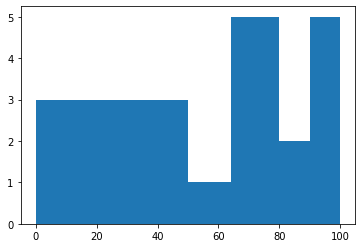

In [159]:
plt.hist(df_0["Exam 1 Fixed"],bins=list(grades.values()))

Now we can write the function:

In [160]:
def grade_summary(df_0,grades,min_grade=0.):
    df=df_0[df_0>min_grade]
    N_total=sum(df>min_grade)
    hist,bins=np.histogram(df,bins=list(grades.values()))

    print("Mean:",np.mean(df))
    print("Std:",np.std(df))
    
    for grade_letter,bin_count in zip(grades.keys(),hist):
        print(grade_letter+": "+str(bin_count),
              float(bin_count/N_total) )
    

In [161]:
grade_summary(df_0["Exam 1 Fixed"],grades)

Mean: 77.64285714285714
Std: 18.38713503224136
F: 1 0.07142857142857142
D: 1 0.07142857142857142
C: 5 0.35714285714285715
B: 2 0.14285714285714285
A: 5 0.35714285714285715


In [145]:
grade_summary(df_0["Exam 1 Fixed"],grades,60)

Mean: 82.66666666666667
Std: 14.642024753731599
F: 0 0.0
D: 0 0.0
C: 5 0.4166666666666667
B: 2 0.16666666666666666
A: 5 0.4166666666666667


How about something that implements a bell curve?

In [94]:
def compute_curve(df_0, min_grade=None):

    if min_grade:
        pass
    else:
        min_grade=np.max(df_0)/2.
    
    print("Min grade:",min_grade)

    df=df_0[df_0>min_grade]
    N_total=sum(df_0>min_grade)
    
    print("N Total (post cut):",N_total)
    print("N Total (pre cut):",df_0.shape)
    
    mean=np.mean(df)
    std=np.std(df)

    print("Mean:",mean)
    print("Std:",std)
    
    grade_def=[("A+",np.max(df)),
               ("A", min(np.max(df),mean+std)),
               ("B",mean), 
               ("C",mean-std),
               ("D",mean-2*std),
               ("F",0.)]
    
    grade_def.reverse()
    grades=OrderedDict( grade_def )
    
    
    hist,bins=np.histogram(df,bins=list(grades.values()))
    
    _=plt.hist(df)
    plt.show()
    
    for grade_letter,bin_count,min_grade in zip(grades.keys(),hist,grades.values()):
        print("{:2.2f}".format(min_grade),
              grade_letter+": "+str(bin_count),
              "{:2.2f}%".format(100.*float(bin_count/N_total)) )
    return grades
    

Min grade: 60
N Total (post cut): 12
N Total (pre cut): (16,)
Mean: 82.66666666666667
Std: 14.642024753731599


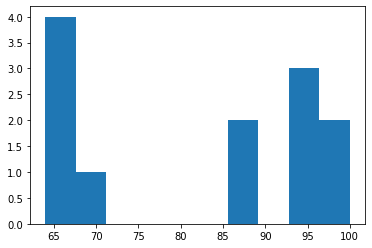

0.00 F: 0 0.00%
53.38 D: 5 41.67%
68.02 C: 0 0.00%
82.67 B: 5 41.67%
97.31 A: 2 16.67%


OrderedDict([('F', 0.0),
             ('D', 53.38261715920348),
             ('C', 68.02464191293507),
             ('B', 82.66666666666667),
             ('A', 97.30869142039828),
             ('A+', 100)])

In [162]:
compute_curve(df_0["Exam 1 Fixed"],60)

How about the labs? 

First lets turn the `NaN`s into `0`s:


In [165]:
df_1=df_0.fillna(0)

In [166]:
df_1

,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,Unnamed: 6,Lab 7,Exam 2,Exam 1 Fixed
0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
2,100,96,46,0,68-sent,0.0,0.0,0.0,0.0,68
4,100,100,90,0,88-sent,0.0,0.0,0.0,0.0,88
6,93,100,24,0,96-sent,0.0,0.0,0.0,0.0,96
8,0,81,0,0,43-sent,0.0,0.0,0.0,0.0,43
10,95,100,105,0,96-sent,0.0,0.0,0.0,0.0,96
12,100,98,87,0,89-sent,0.0,0.0,0.0,0.0,89
14,95,98,50,0,52,0.0,0.0,0.0,0.0,52
16,95,96,98,0,100-sent,0.0,0.0,0.0,0.0,100
18,0,78,37,0,67,0.0,0.0,0.0,0.0,67


Lab 1
Min grade: 50.0
N Total (post cut): 12
N Total (pre cut): (16,)
Mean: 96.58333333333333
Std: 2.6912925436591904


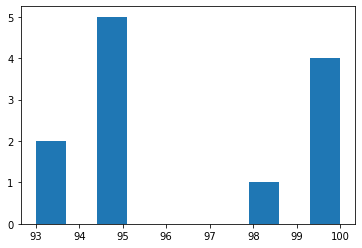

0.00 F: 0 0.00%
91.20 D: 2 16.67%
93.89 C: 5 41.67%
96.58 B: 1 8.33%
99.27 A: 4 33.33%
Lab 2
Min grade: 50.0
N Total (post cut): 15
N Total (pre cut): (16,)
Mean: 91.53333333333333
Std: 8.655377262462657


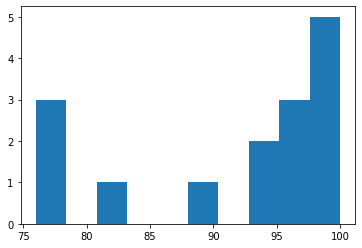

0.00 F: 0 0.00%
74.22 D: 4 26.67%
82.88 C: 1 6.67%
91.53 B: 7 46.67%
100.00 A: 3 20.00%
Lab 3
Min grade: 52.5
N Total (post cut): 6
N Total (pre cut): (16,)
Mean: 88.0
Std: 14.011899704655802


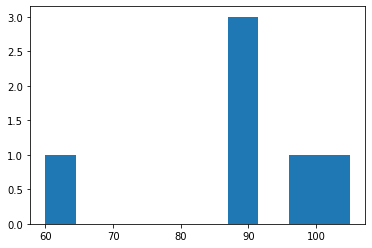

0.00 F: 0 0.00%
59.98 D: 1 16.67%
73.99 C: 1 16.67%
88.00 B: 3 50.00%
102.01 A: 1 16.67%


In [167]:
for name in ["Lab 1","Lab 2","Lab 3"]:
    df=df_1[name].astype('int32')
    print(name)
    compute_curve(df)

How about a function to assign grades:

In [172]:
def assign_grade(numeric,grades):
    previous_grade="F"
    for grade_letter,grade_boundry in grades.items():
        #print(numeric, grade_letter,grade_boundry)
        if numeric < grade_boundry:
            return previous_grade
            break
        else:
            previous_grade=grade_letter
    return previous_grade

    

In [173]:
for item in df_0["Exam 1 Fixed"].astype('int32'):
    print(item,assign_grade(item, grades))

0 F
68 C
88 B
96 A
43 F
96 A
89 B
52 D
100 A+
67 C
0 F
66 C
96 A
64 C
64 C
98 A


In [174]:
assign_grade(90,grades)

'A'

In [179]:
def assign_grades(name,grades):
    letter_grades=list()
    for item in df_1[name].astype('int32'):
        letter_grades.append(assign_grade(item, grades))
    return letter_grades

In [180]:
assign_grades("Exam 1 Fixed",grades)

['F',
 'C',
 'B',
 'A',
 'F',
 'A',
 'B',
 'D',
 'A+',
 'C',
 'F',
 'C',
 'A',
 'C',
 'C',
 'A']

In [181]:
letter_grades=dict()
for name in ["Lab 1","Lab 2","Lab 3"]:
    letter_grades[name]=assign_grades(name,grades)

In [135]:
letter_grades["Lab 3"]

['F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'B',
 'F',
 'F',
 'A',
 'C',
 'F',
 'A',
 'F',
 'A',
 'F',
 'F',
 'F',
 'F',
 'B',
 'F',
 'A+',
 'B',
 'F',
 'F',
 'C',
 'F',
 'F',
 'F']